In [1]:
# Table 2

In [2]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# reading dataset

df = pd.read_csv('/home/pedro/Desktop/covid/influd_5may/INFLU20-04052020.csv',sep=';',encoding = "ISO-8859-1")

# Selecting people from South Center with COVID-19
#df = df[df['PCR_SARS2']==1][(df['SG_UF_NOT']=='SP') | (df['SG_UF_NOT']=='RJ')| (df['SG_UF_NOT']=='RS')\
#| (df['SG_UF_NOT']=='SC')| (df['SG_UF_NOT']=='DF')| (df['SG_UF_NOT']=='ES')| (df['SG_UF_NOT']=='PR')\
#| (df['SG_UF_NOT']=='MG')| (df['SG_UF_NOT']=='MS')| (df['SG_UF_NOT']=='GO')| (df['SG_UF_NOT']=='MT')]\
#[df['CS_RACA']!=9][df['CS_RACA'].notna()][df['HOSPITAL']==1]
 

# Selecting people from North Northeast with COVID-19
df = df[df['PCR_SARS2']==1][(df['SG_UF_NOT']=='RO') | (df['SG_UF_NOT']=='TO')| (df['SG_UF_NOT']=='RN')\
| (df['SG_UF_NOT']=='PE')| (df['SG_UF_NOT']=='AM')| (df['SG_UF_NOT']=='SE')| (df['SG_UF_NOT']=='CE')\
| (df['SG_UF_NOT']=='PB')| (df['SG_UF_NOT']=='BA')| (df['SG_UF_NOT']=='RR')| (df['SG_UF_NOT']=='AC')\
| (df['SG_UF_NOT']=='PA')| (df['SG_UF_NOT']=='AL')| (df['SG_UF_NOT']=='PI')| (df['SG_UF_NOT']=='MA')\
| (df['SG_UF_NOT']=='AP')][df['CS_RACA']!=9][df['CS_RACA'].notna()][df['HOSPITAL']==1]

print('confirmed data in North Northeast:',df.shape[0])
#print('confirmed data in South Center:',df.shape[0])


/home/pedro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,61,62,63,105,107,123,132,136) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


confirmed data in North Northeast: 2043


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [4]:
# diagnostico
# hospitalization
# ICU 

print(df['EVOLUCAO'].value_counts())
print(df['EVOLUCAO'].isna().sum())

2.0    871
1.0    479
9.0     85
Name: EVOLUCAO, dtype: int64
608


In [5]:
# Deaths hospitalization and ICU


print(df['CS_RACA'][((df['EVOLUCAO']==2)&(df['UTI']==1))].value_counts().sort_index(ascending=True))
print(100*df['CS_RACA'][((df['EVOLUCAO']==2)&(df['UTI']==1))].value_counts().sort_index(ascending=True)/df['CS_RACA'][((df['EVOLUCAO']==2)&(df['UTI']==1))].value_counts().sum())

#  UTI:        1- Yes    2- Not       9-Ignored 
#  EVOLUCAO:   1- Cure   2- Death     9-Ignored



1.0     67
2.0     15
3.0      7
4.0    315
5.0      3
Name: CS_RACA, dtype: int64
1.0    16.461916
2.0     3.685504
3.0     1.719902
4.0    77.395577
5.0     0.737101
Name: CS_RACA, dtype: float64


In [6]:
# Deaths hospitalization and without ICU


print(df['CS_RACA'][((df['EVOLUCAO']==2)&(df['UTI']==2))].value_counts().sort_index(ascending=True))
print(100*df['CS_RACA'][((df['EVOLUCAO']==2)&(df['UTI']==2))].value_counts().sort_index(ascending=True)/df['CS_RACA'][((df['EVOLUCAO']==2)&(df['UTI']==2))].value_counts().sum())



1.0     47
2.0     13
3.0      4
4.0    286
Name: CS_RACA, dtype: int64
1.0    13.428571
2.0     3.714286
3.0     1.142857
4.0    81.714286
Name: CS_RACA, dtype: float64


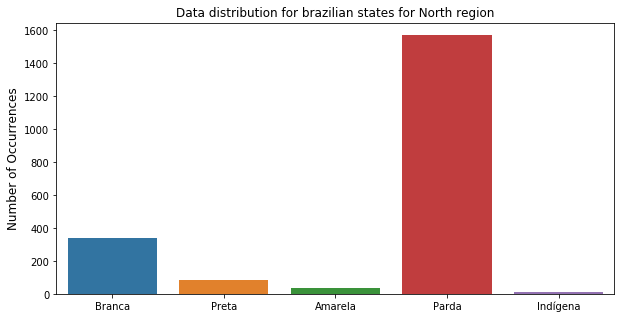

1.0     342
2.0      85
3.0      36
4.0    1567
5.0      13
Name: CS_RACA, dtype: int64
1.0    16.740088
2.0     4.160548
3.0     1.762115
4.0    76.700930
5.0     0.636319
Name: CS_RACA, dtype: float64


In [7]:
# Data distribution color in diagnosis

city_count  = df['CS_RACA'].value_counts()
city_count = city_count[:,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=1)
plt.title('Data distribution for brazilian states for North region', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
bars = ('Branca', 'Preta', 'Amarela', 'Parda', 'Indígena')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()


# General ditribution
print(df['CS_RACA'].value_counts().sort_index(ascending=True))
print(100*df['CS_RACA'].value_counts().sort_index(ascending=True)/df['CS_RACA'].notnull().sum())

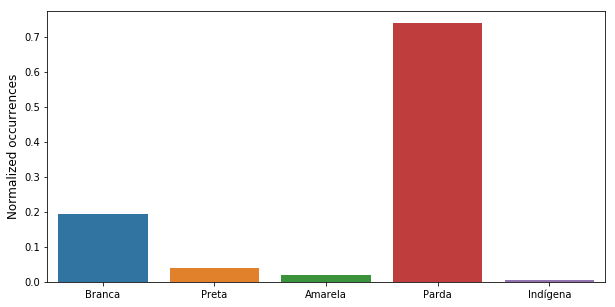

1.0    19.478528
2.0     3.987730
3.0     1.993865
4.0    73.773006
5.0     0.766871
Name: CS_RACA, dtype: float64
1.0    127
2.0     26
3.0     13
4.0    481
5.0      5
Name: CS_RACA, dtype: int64


In [8]:
# Data distribution for people in UCI

city_count  = df['CS_RACA'][df['UTI']==1].value_counts()/df['CS_RACA'][df['UTI']==1].notnull().sum()
city_count = city_count[:,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=1)
plt.ylabel('Normalized occurrences', fontsize=12)
bars = ('Branca', 'Preta', 'Amarela', 'Parda', 'Indígena')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

# percentage
print(100*df['CS_RACA'][df['UTI']==1].value_counts().sort_index(ascending=True)/df['CS_RACA'][df['UTI']==1].notnull().sum())
print(df['CS_RACA'][df['UTI']==1].value_counts().sort_index(ascending=True))

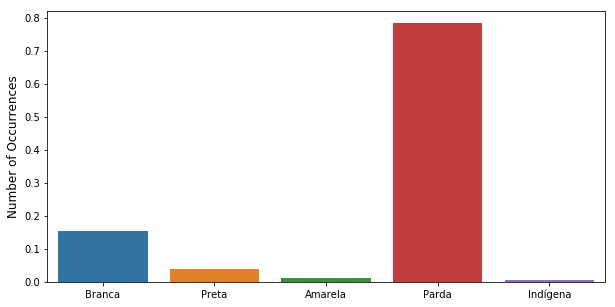

1.0    15.614237
2.0     4.018370
3.0     1.377727
4.0    78.415614
5.0     0.574053
Name: CS_RACA, dtype: float64
1.0    136
2.0     35
3.0     12
4.0    683
5.0      5
Name: CS_RACA, dtype: int64


In [9]:
# Data distribution for died people 

city_count  = df['CS_RACA'][df['EVOLUCAO']==2].value_counts()/df['CS_RACA'][df['EVOLUCAO']==2].notnull().sum()
city_count = city_count[:,]
city_count = city_count[:,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=1)
plt.ylabel('Number of Occurrences', fontsize=12)
bars = ('Branca', 'Preta', 'Amarela', 'Parda', 'Indígena')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

# percentage
print(100*df['CS_RACA'][df['EVOLUCAO']==2].value_counts().sort_index(ascending=True)/df['CS_RACA'][df['EVOLUCAO']==2].notnull().sum())
print(df['CS_RACA'][df['EVOLUCAO']==2].value_counts().sort_index(ascending=True))